In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Signal Analysis

In [43]:
# Load the data
data = np.load('signal_windowing_exercise.npz')
print(data.files)
x = data['x']
y = data['y']
print(data['x'].shape)
print(data['y'].shape)
print(x)
print(y)

['x', 'y']
(100,)
(100,)
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[-0.00904107  1.88237604 -1.42594119  1.0385473   1.73529073 -0.40401106
  1.02630242  2.48878706 -0.7532157   2.12456272  1.85325902 -0.06181844
  2.23112868  1.78561494  0.37692627  1.88920554  2.06036014 -0.22061164
  2.2102458   0.86688249  0.28821903  0.89597863  0.69178824 -0.21015929
  0.33610337  0.27239355 -0.63830198  0.08545032 -0.65823483 -0.26570602
 -1.34572604 -0.27785528 -1.442293   -1.46045532 -0.83752361 -1.48359776
 -1.98582829 -0.75567679 -1.26817944 -2.51977194  0.25680724 -1.93503733
 -1.66098982 -0.003513   -1.19054089 -1.91895975  0.81139

In [ ]:
# DFT function from the previous exercise round
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)

    for k in range(N):
        sum_real = 0
        sum_imaginary = 0

        for n in range(N):
            angle = -2 * np.pi * n * k / N
            real_part = np.cos(angle)
            imaginary_part = np.sin(angle)
            sum_real += x[n] * real_part
            sum_imaginary += x[n] * imaginary_part

        X[k] = (sum_real + sum_imaginary * 1j)*100 / N

    return X

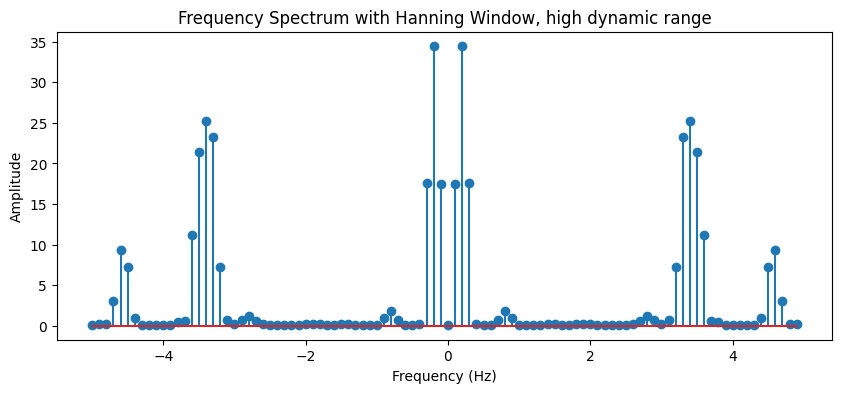

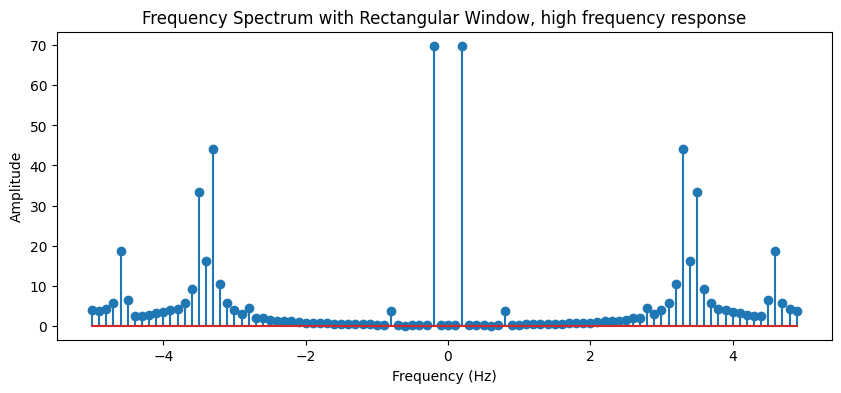

In [ ]:
# DFT Spectrums
fs = 10
signal_length = x.shape[0]
N = signal_length
window_hanning = np.hanning(N)
window_rectangular = np.ones(N)

dft_hanning = dft(y * window_hanning)
dft_rectangular = dft(y * window_rectangular)

frequencies = np.fft.fftfreq(N, 1/fs)

amplitudes_hanning = np.abs(dft_hanning)
amplitudes_rectangular = np.abs(dft_rectangular)

plt.figure(figsize=(10, 4))
plt.stem(frequencies, amplitudes_hanning)
plt.title('Frequency Spectrum with Hanning Window, high dynamic range')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10, 4))
plt.stem(frequencies, amplitudes_rectangular)
plt.title('Frequency Spectrum with Rectangular Window, high frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.show()

# 2. Window functions


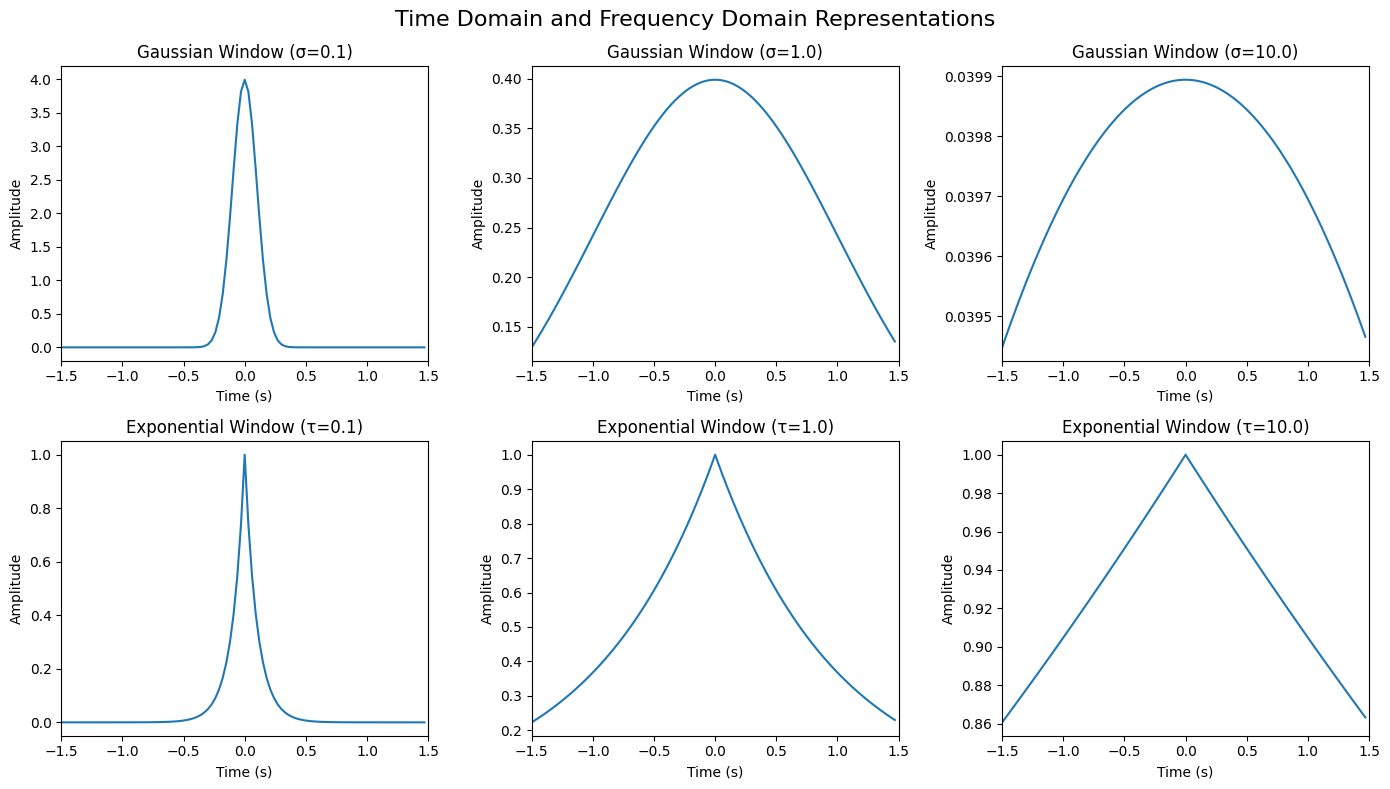

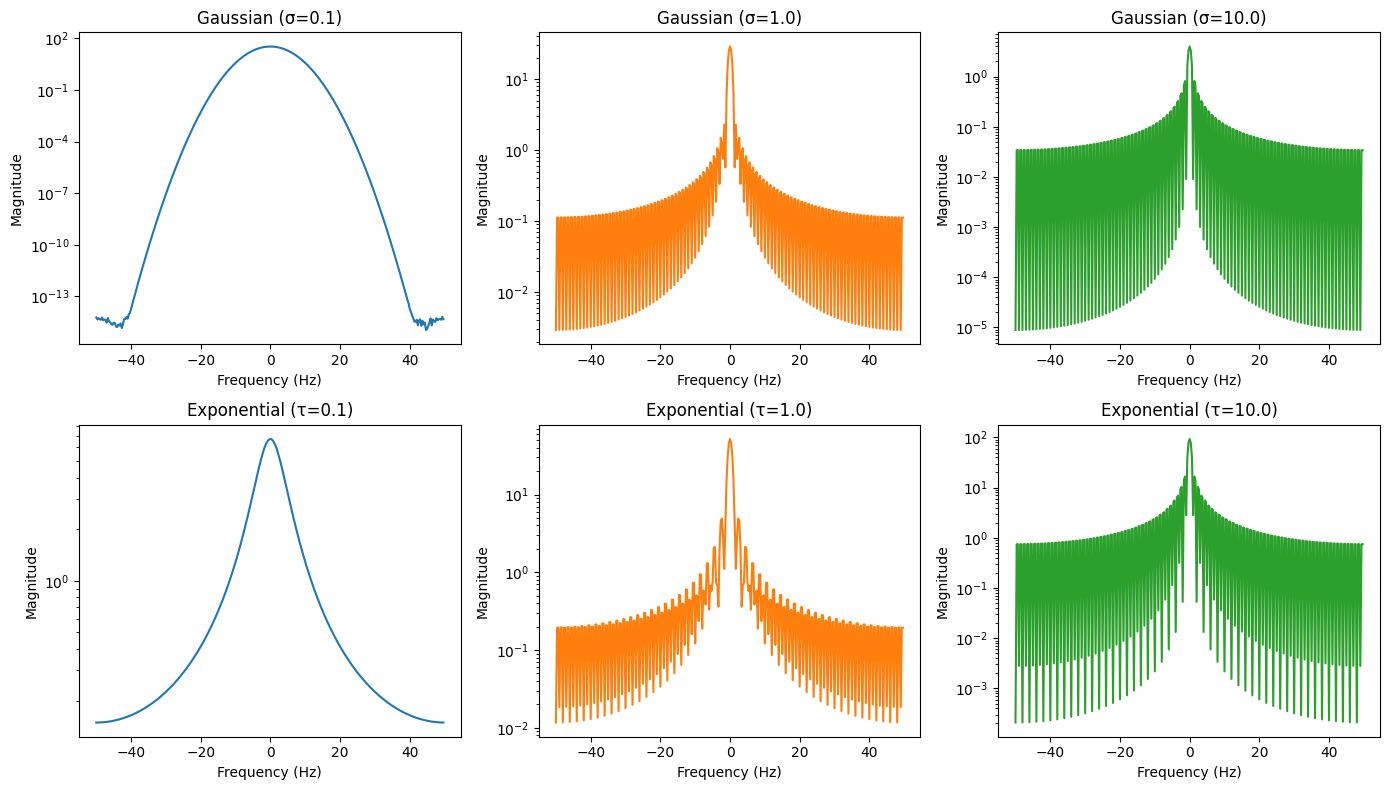

In [ ]:
def exponential_window(t, tau):
    return np.exp(-np.abs(t) / tau)

def gaussian_window(t, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (t ** 2) / (sigma ** 2))

# Parameters
N = 100
TW = 3
t = np.linspace(-TW/2, TW/2, N, endpoint=False)

# Different values
sigma_values = [0.1, 1.0, 10.0]
tau_values = [0.1, 1.0, 10.0]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for i, sigma in enumerate(sigma_values):
    axes[0, i].plot(t, gaussian_window(t, sigma))
    axes[0, i].set_title(f'Gaussian Window (σ={sigma})')
    axes[0, i].set_xlabel('Time (s)')
    axes[0, i].set_ylabel('Amplitude')
    axes[0, i].set_xlim(-TW/2, TW/2)

for i, tau in enumerate(tau_values):
    axes[1, i].plot(t, exponential_window(t, tau))
    axes[1, i].set_title(f'Exponential Window (τ={tau})')
    axes[1, i].set_xlabel('Time (s)')
    axes[1, i].set_ylabel('Amplitude')
    axes[1, i].set_xlim(-TW/2, TW/2)

fig.suptitle('Time Domain and Frequency Domain Representations', fontsize=16)
fig.tight_layout()

fig_freq, axes_freq = plt.subplots(2, 3, figsize=(14, 8))

def plot_frequency_domain(window, label, ax, color, linestyle='-'):
    N = 100
    zeros = np.zeros(N)
    window_zp = [*zeros, *window, *zeros]
    spectrum = np.fft.fftshift(np.abs(np.fft.fft(window_zp, 3*N)))
    frequency = np.fft.fftshift(np.fft.fftfreq(3*N, TW / (3*N)))
    ax.semilogy(frequency, spectrum, label=label, color=color, linestyle=linestyle)
    ax.set_title(label)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude')

for i, sigma in enumerate(sigma_values):
    plot_frequency_domain(gaussian_window(t, sigma), f'Gaussian (σ={sigma})', color=f'C{i}', ax=axes_freq[0, i])

for i, tau in enumerate(tau_values):
    plot_frequency_domain(exponential_window(t, tau), f'Exponential (τ={tau})', color=f'C{i}', ax=axes_freq[1, i])

fig_freq.tight_layout()

plt.show()


# 3. Gibbs Ringing

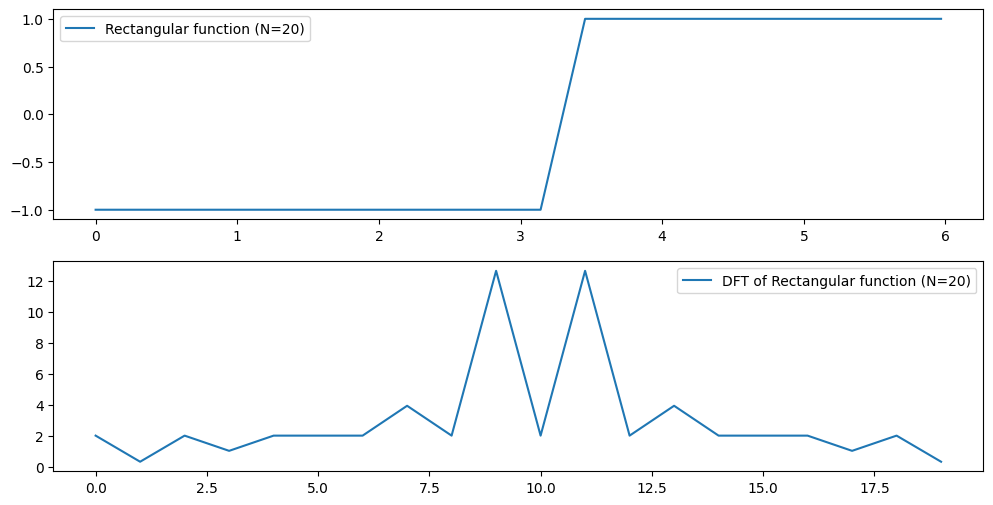

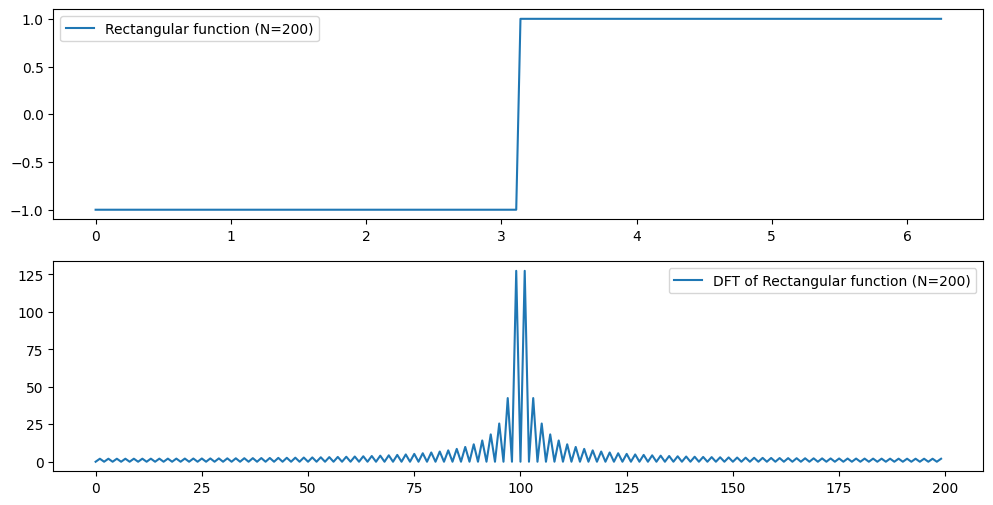

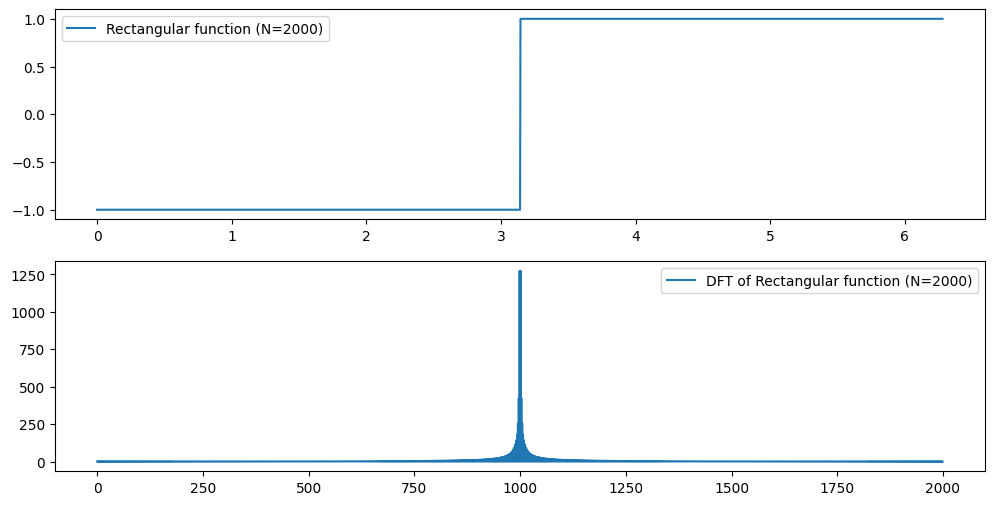

In [ ]:
# Rectangular function
def rectangular_function(x):
    return np.where((0 <= x) & (x <= np.pi), -1, 1)

# DFTs
def dft_and_idft(signal):
    N = len(signal)
    dft = np.fft.fft(signal)
    idft = np.fft.ifft(dft)
    return dft, idft

def demonstrate_gibbs(N):
    x = np.linspace(0, 2 * np.pi, N, endpoint=False)
    rect_signal = rectangular_function(x)
    dft_rect_signal, idft_rect_signal = dft_and_idft(rect_signal)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(x, rect_signal, label=f'Rectangular function (N={N})')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(np.fft.fftshift(np.abs(dft_rect_signal)), label=f'DFT of Rectangular function (N={N})')
    plt.legend()
    plt.show()

N_values = [20, 200, 2000]
for N in N_values:
    demonstrate_gibbs(N)

